# import modules

In [9]:
import sys

sys.path.insert(0, "../")

from modules.contours_ver0 import *
from modules.default_params_ver1 import *
from modules.plot_utils import *

# mismatch optimized over $\tilde{\theta}$, $\tilde{\Omega}$, and $\gamma_P$

In [10]:
from modules.contours_ver0 import *

print("Number of cores: ", cpu_count())

Number of cores:  8


# assign params

In [11]:
lens_params_1["mcz"] = RP_params_1["mcz"] = 30 * solar_mass

# as a function of $\Delta t_d$ while fixing $I$

In [12]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)

RP_params["omega_tilde"] = 3.0

MLz_limits = get_lens_limits_for_RP_L(RP_params, lens_params["y"])
print(MLz_limits)

{'MLz_min': 403.8448150570481, 'MLz_max': 4623.659020079905, 'td_min': 0.0039892110766206225, 'td_max': 0.045672870096930815}


In [5]:
MLz_arr = np.linspace(
    math.floor(MLz_limits["MLz_min"]), math.ceil(MLz_limits["MLz_max"]), 10
)

data_td = create_contours_td(RP_params, lens_params, MLz_arr)

In [6]:
filepath = pickle_data(data_td, "../data", "mismatch_contours_mcz30_td")

Results saved as ../data/mismatch_contours_td_2024-04-29_15-04-12.pkl


In [6]:
with open(filepath, "rb") as f:
    data_td = pickle.load(f)

data_td

{0.003980865926558968: {'contour': {'omega_matrix': array([[0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667,

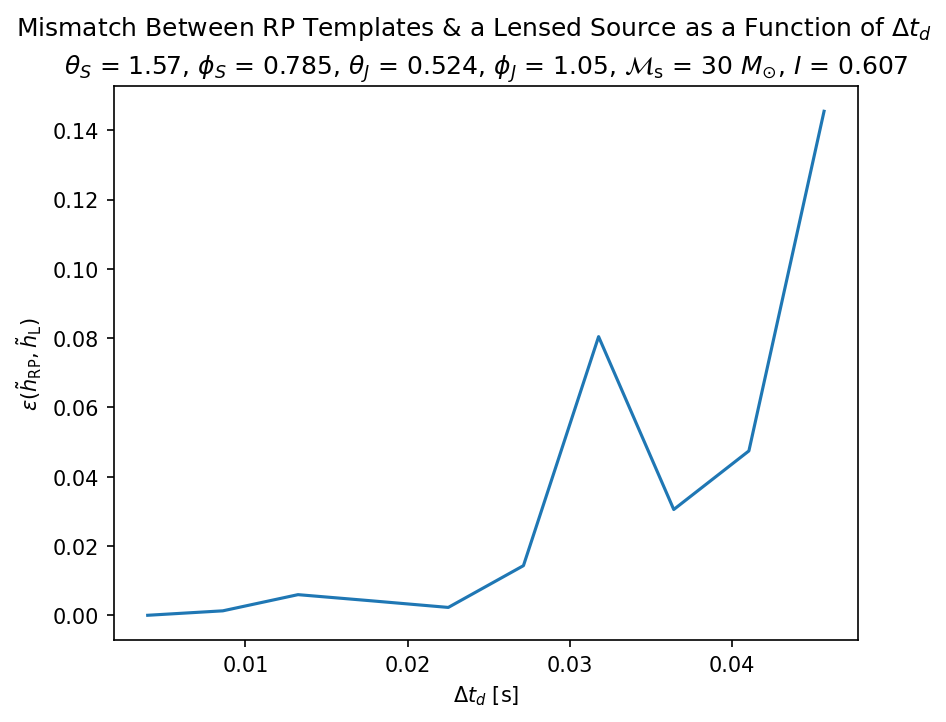

In [7]:
td_arr = data_td["td_arr"]
td_ep_min_arr = np.array([data_td[td]["stats"]["ep_min"] for td in td_arr])

plt.plot(td_arr, td_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$\Delta t_d$ [s]")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        lens_params["theta_S"],
        lens_params["phi_S"],
        lens_params["theta_J"],
        lens_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        lens_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_td["I"],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

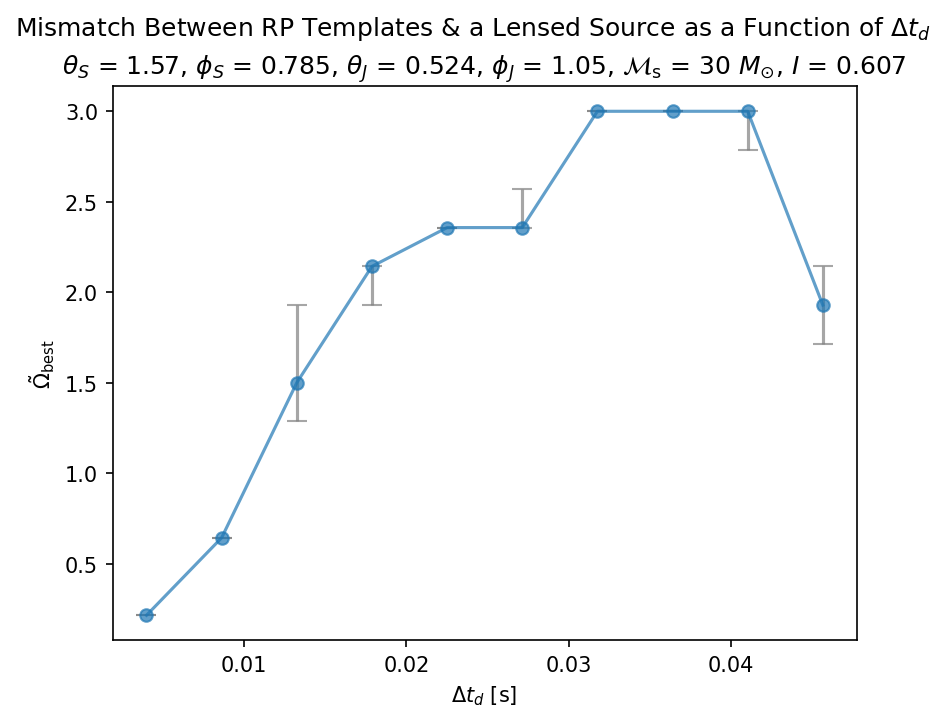

In [8]:
td_arr = data_td["td_arr"]
td_ep_min_omega_tilde_arr = np.array(
    [data_td[td]["stats"]["ep_min_omega_tilde"] for td in td_arr]
)

plt.errorbar(
    td_arr,
    td_ep_min_omega_tilde_arr,
    yerr=get_asym_err(data_td, td_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [s]")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        lens_params["theta_S"],
        lens_params["phi_S"],
        lens_params["theta_J"],
        lens_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        lens_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_td["I"],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

# as a function of $I$ while fixing $\Delta t_d$

In [3]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)

y_arr = np.linspace(0.5, 3, 20)[::-1]
data_I = create_contours_I(RP_params, lens_params, 0.0396, y_arr)

[ 257.71784908  274.14450978  292.20320543  312.12979377  334.20813313
  358.78332592  386.27969508  417.22560277  452.28836469  492.32440467
  538.45301605  592.16777476  655.51005931  731.34910016  823.85336422
  939.32504969 1087.77152808 1286.10315355 1565.32913581 1989.11607399]


In [4]:
filepath = pickle_data(data_I, "../data", "data_I")

Results saved as ../data/mismatch_contours_I_2024-04-29_08-23-04.pkl


In [5]:
with open(filepath, "rb") as f:
    data_I = pickle.load(f)

data_I

{0.008403954844176704: {'contour': {'omega_matrix': array([[0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667,

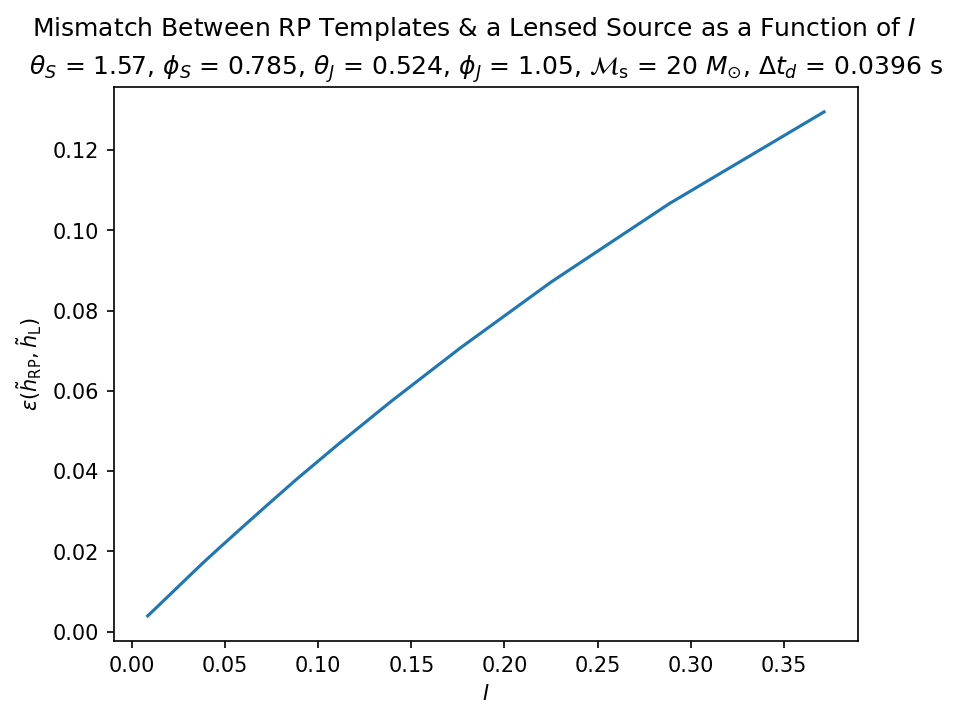

In [6]:
I_arr = data_I["I_arr"]
I_ep_min_arr = np.array([data_I[I]["stats"]["ep_min"] for I in I_arr])

plt.plot(I_arr, I_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$I$")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        lens_params["theta_S"],
        lens_params["phi_S"],
        lens_params["theta_J"],
        lens_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        lens_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

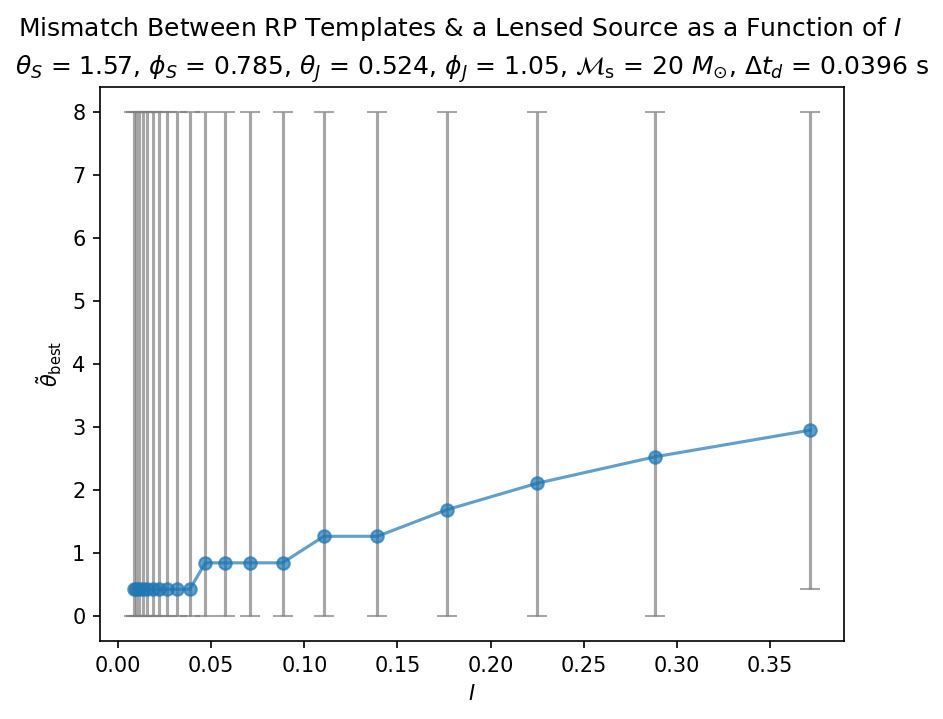

In [7]:
I_arr = data_I["I_arr"]
I_ep_min_theta_tilde_arr = np.array(
    [data_I[I]["stats"]["ep_min_theta_tilde"] for I in I_arr]
)

plt.errorbar(
    I_arr,
    I_ep_min_theta_tilde_arr,
    yerr=get_asym_err(data_I, I_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        lens_params["theta_S"],
        lens_params["phi_S"],
        lens_params["theta_J"],
        lens_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        lens_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

# waveform comparison

idx = -1.86998e-08, phi = -2.93229e-08, both should be ~0 if get_updated_mismatch_results is True


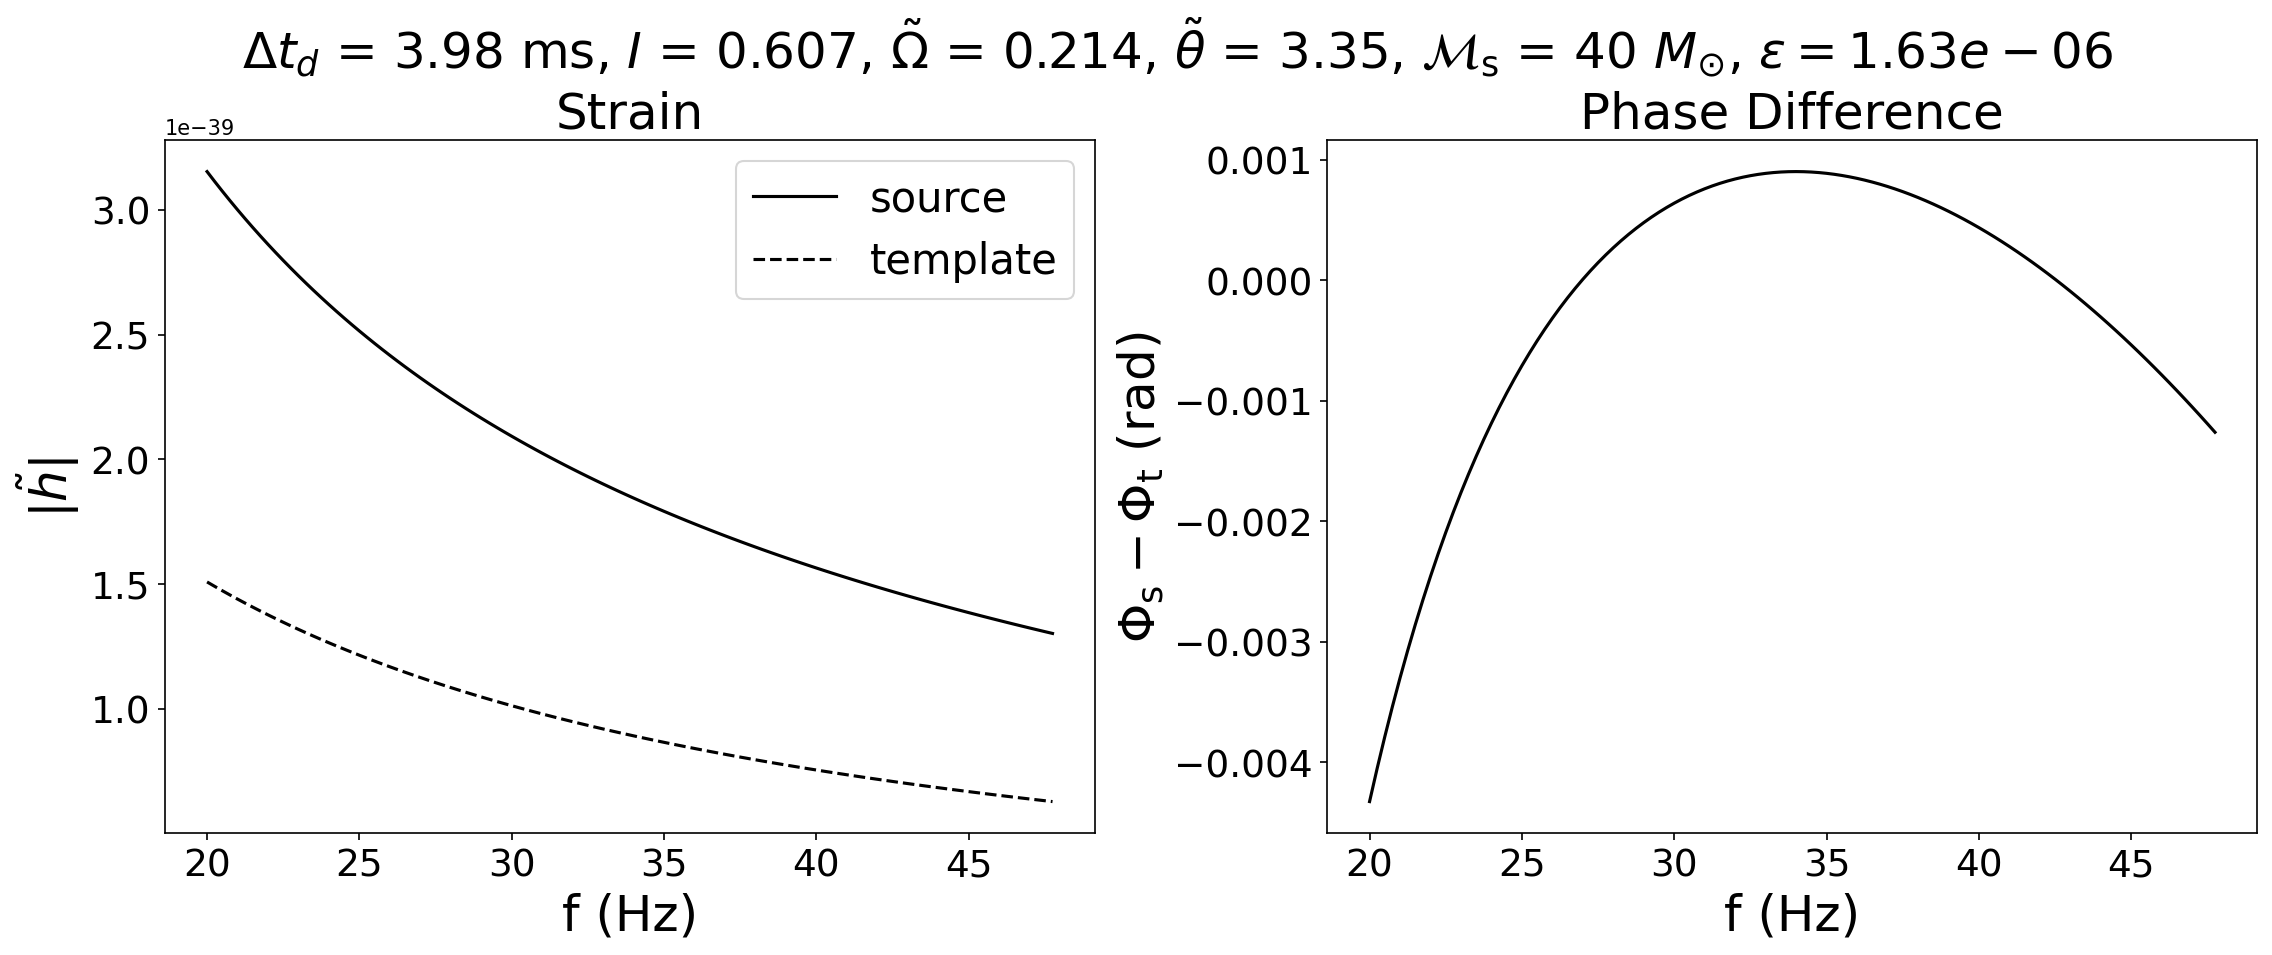

idx = -1.67819e-08, phi = 2.99516e-09, both should be ~0 if get_updated_mismatch_results is True


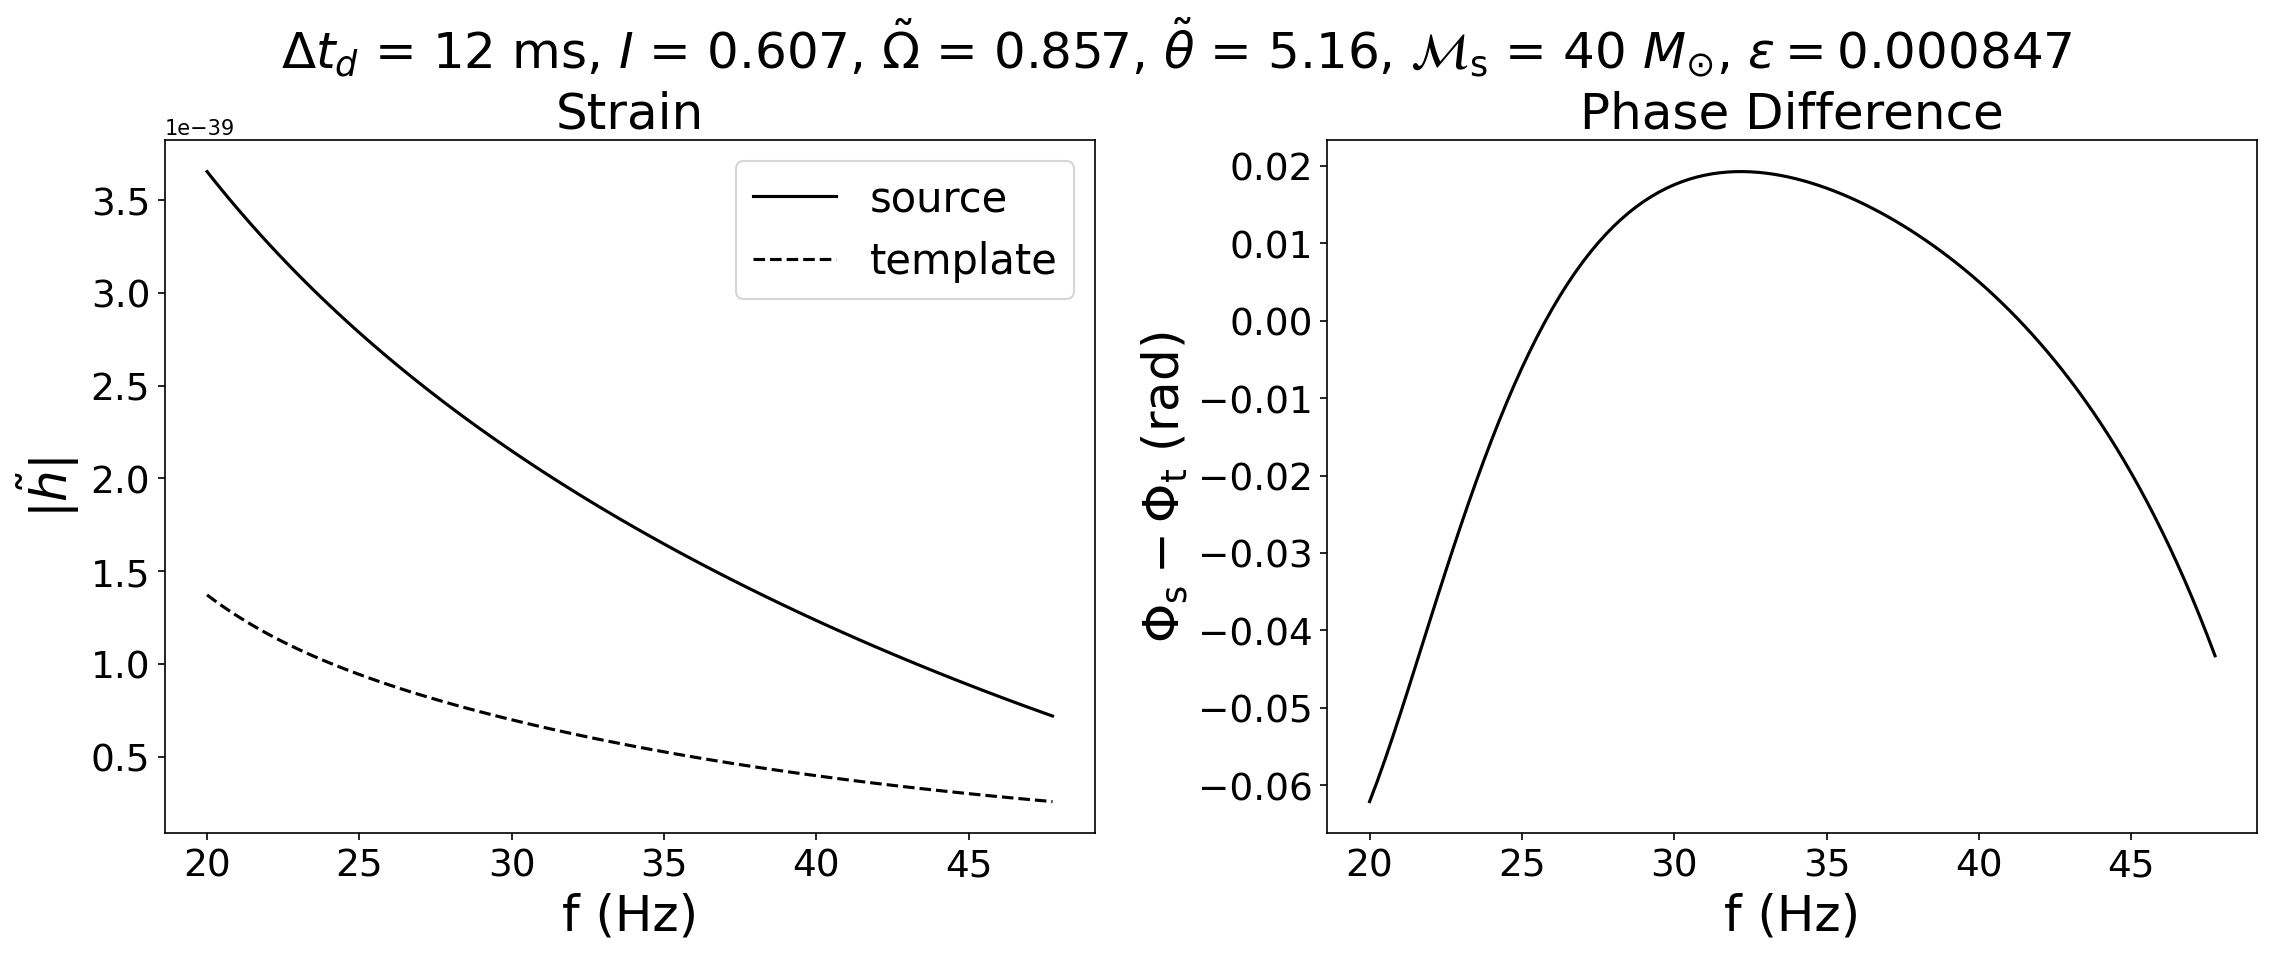

idx = 2.60697, phi = 1.97265e-14, both should be ~0 if get_updated_mismatch_results is True


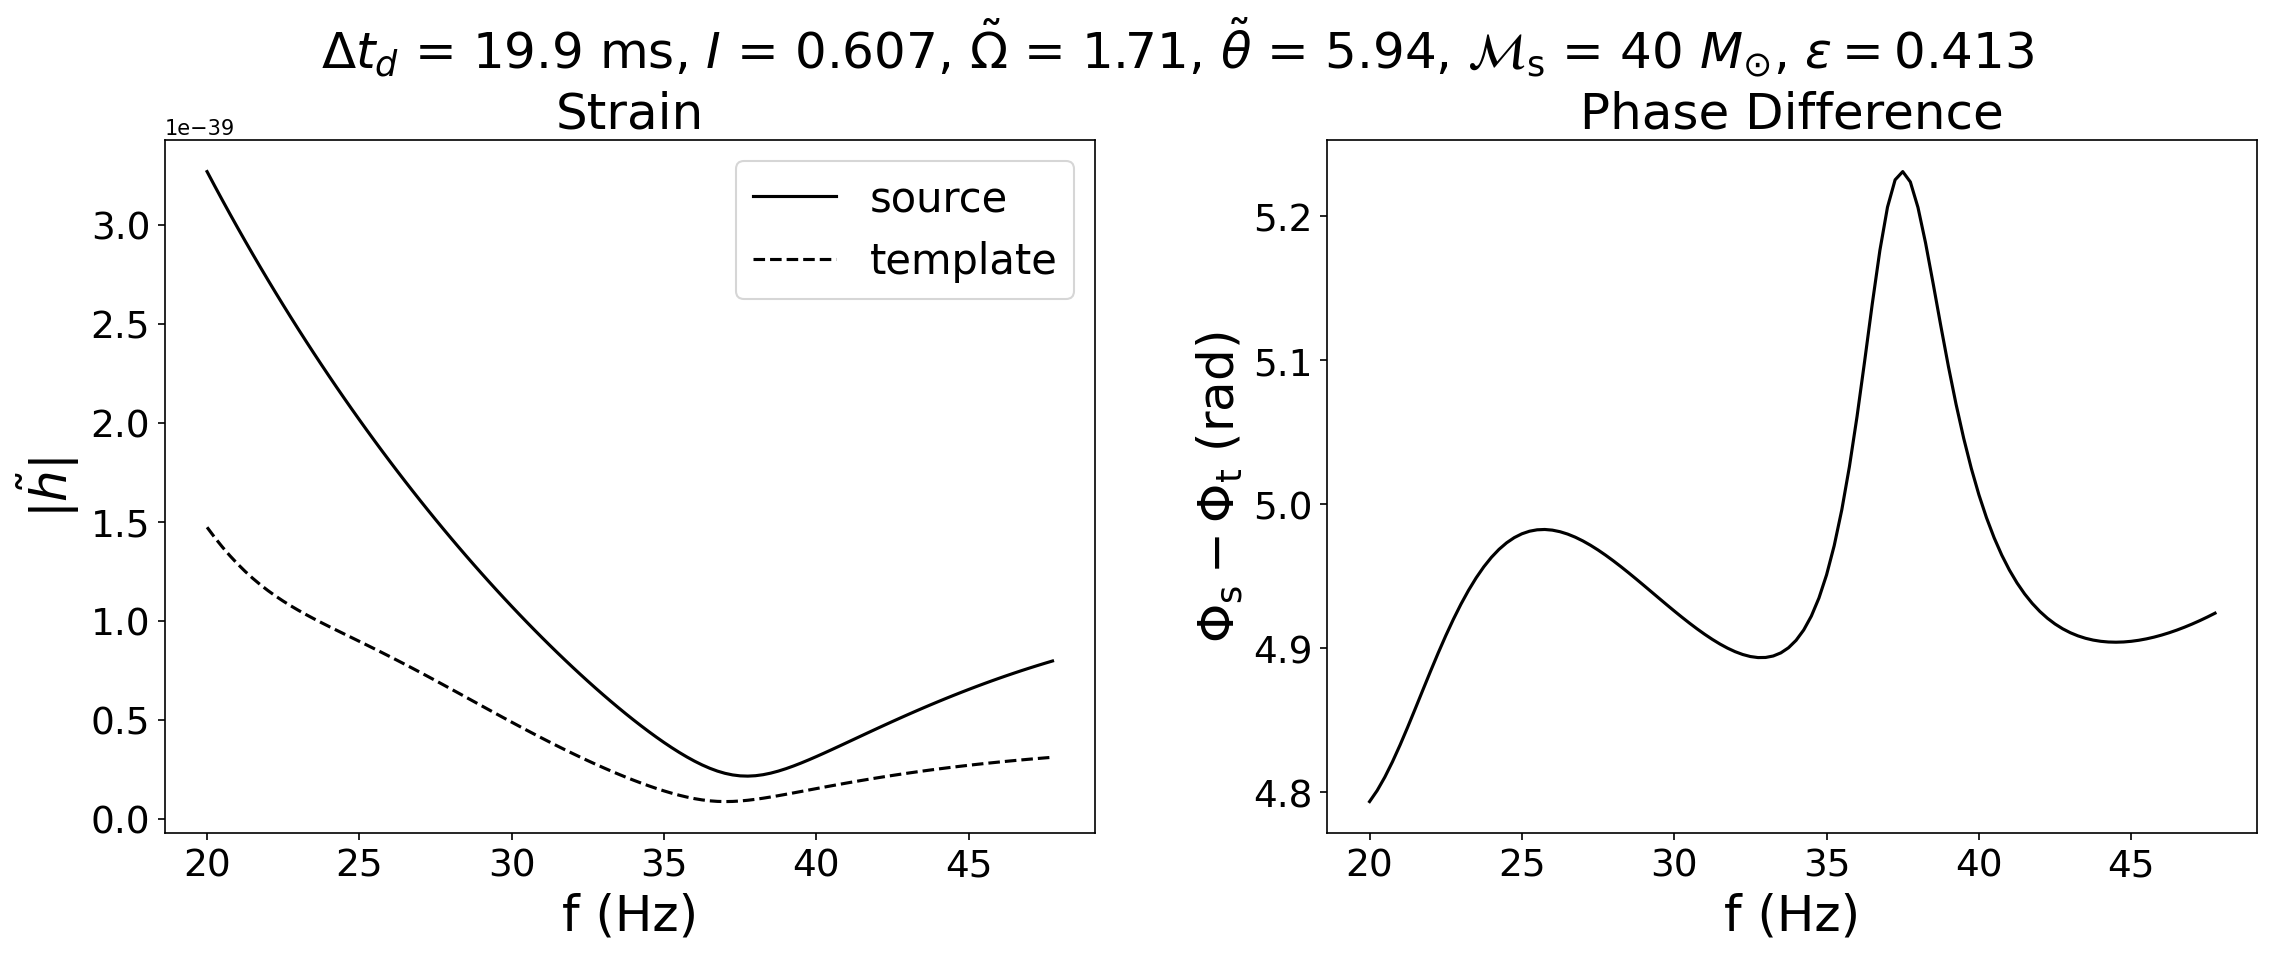

idx = 4.31316e-10, phi = 8.81398e-11, both should be ~0 if get_updated_mismatch_results is True


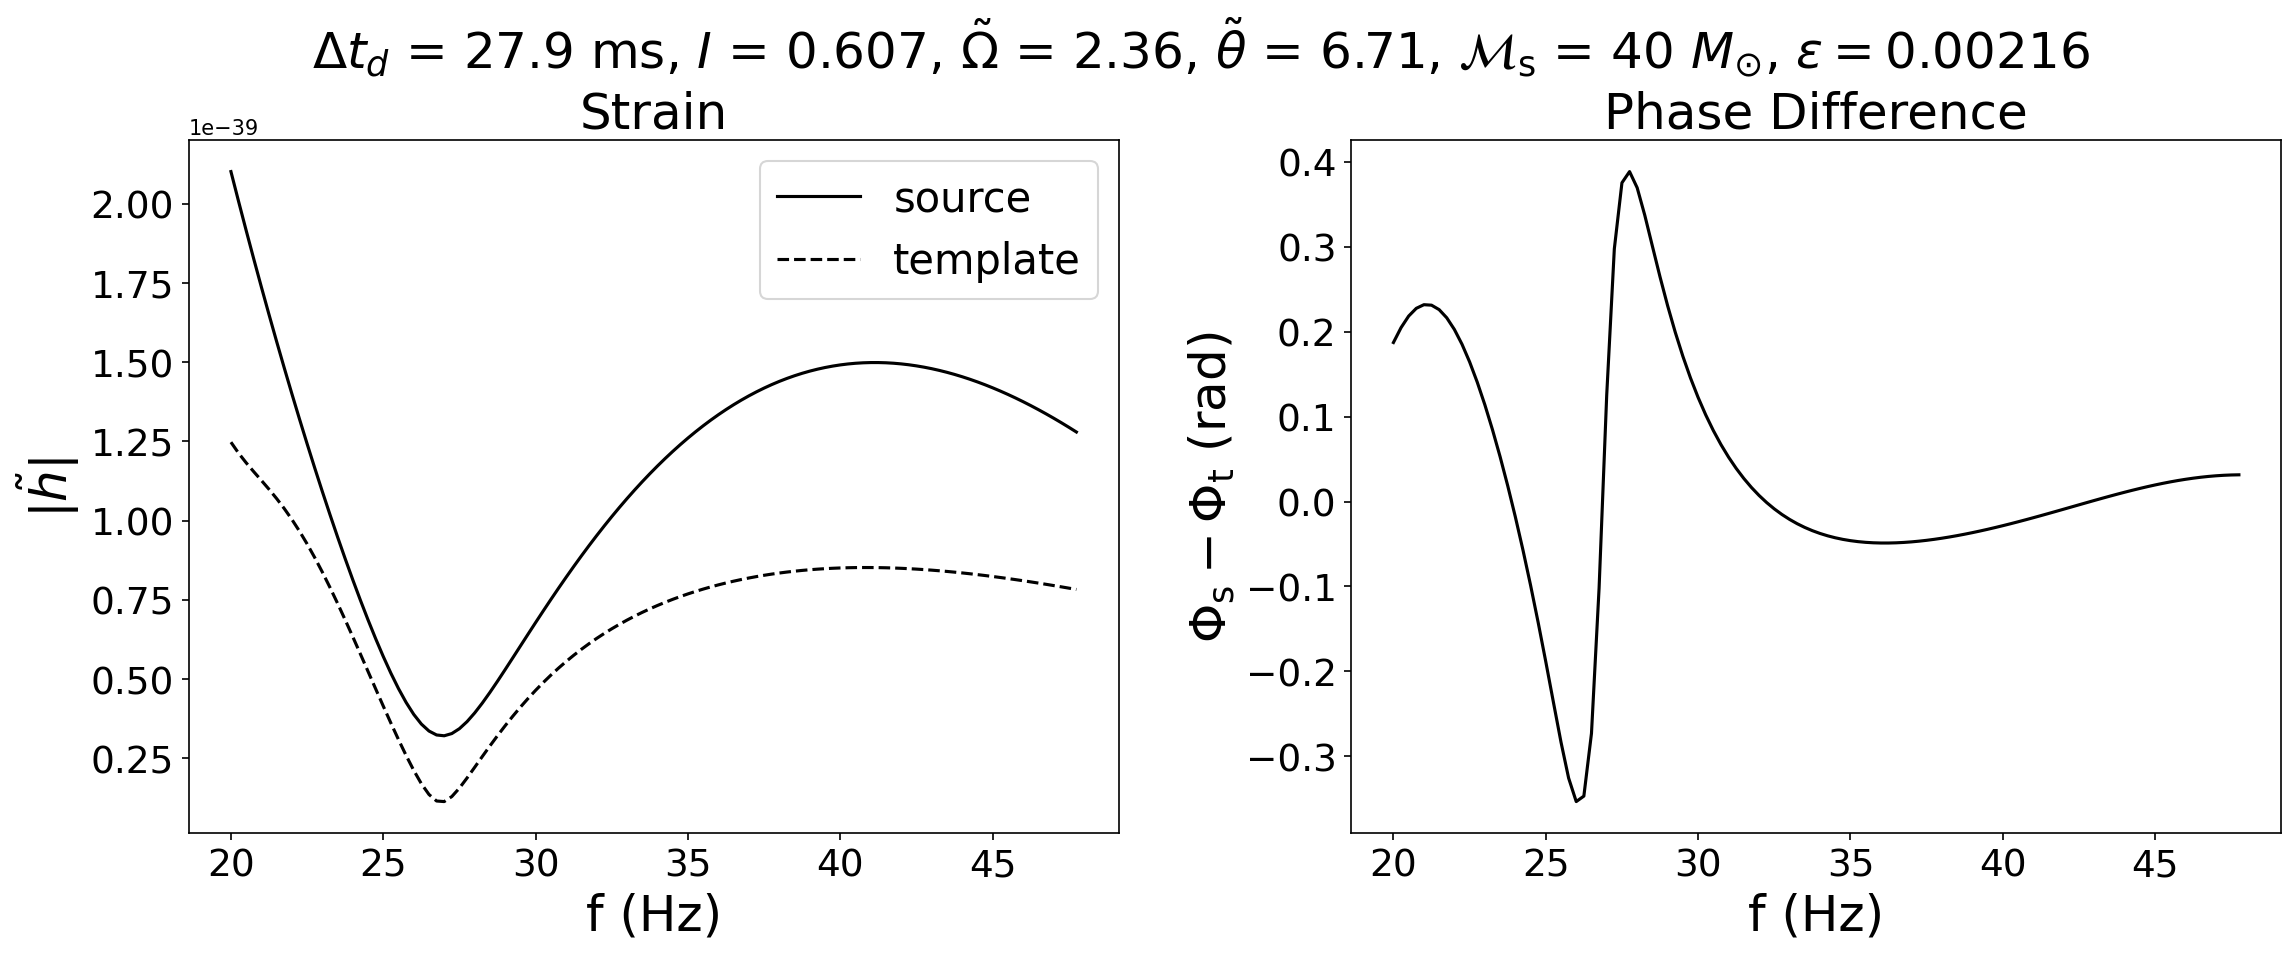

idx = -4.44504e-09, phi = 1.30551e-08, both should be ~0 if get_updated_mismatch_results is True


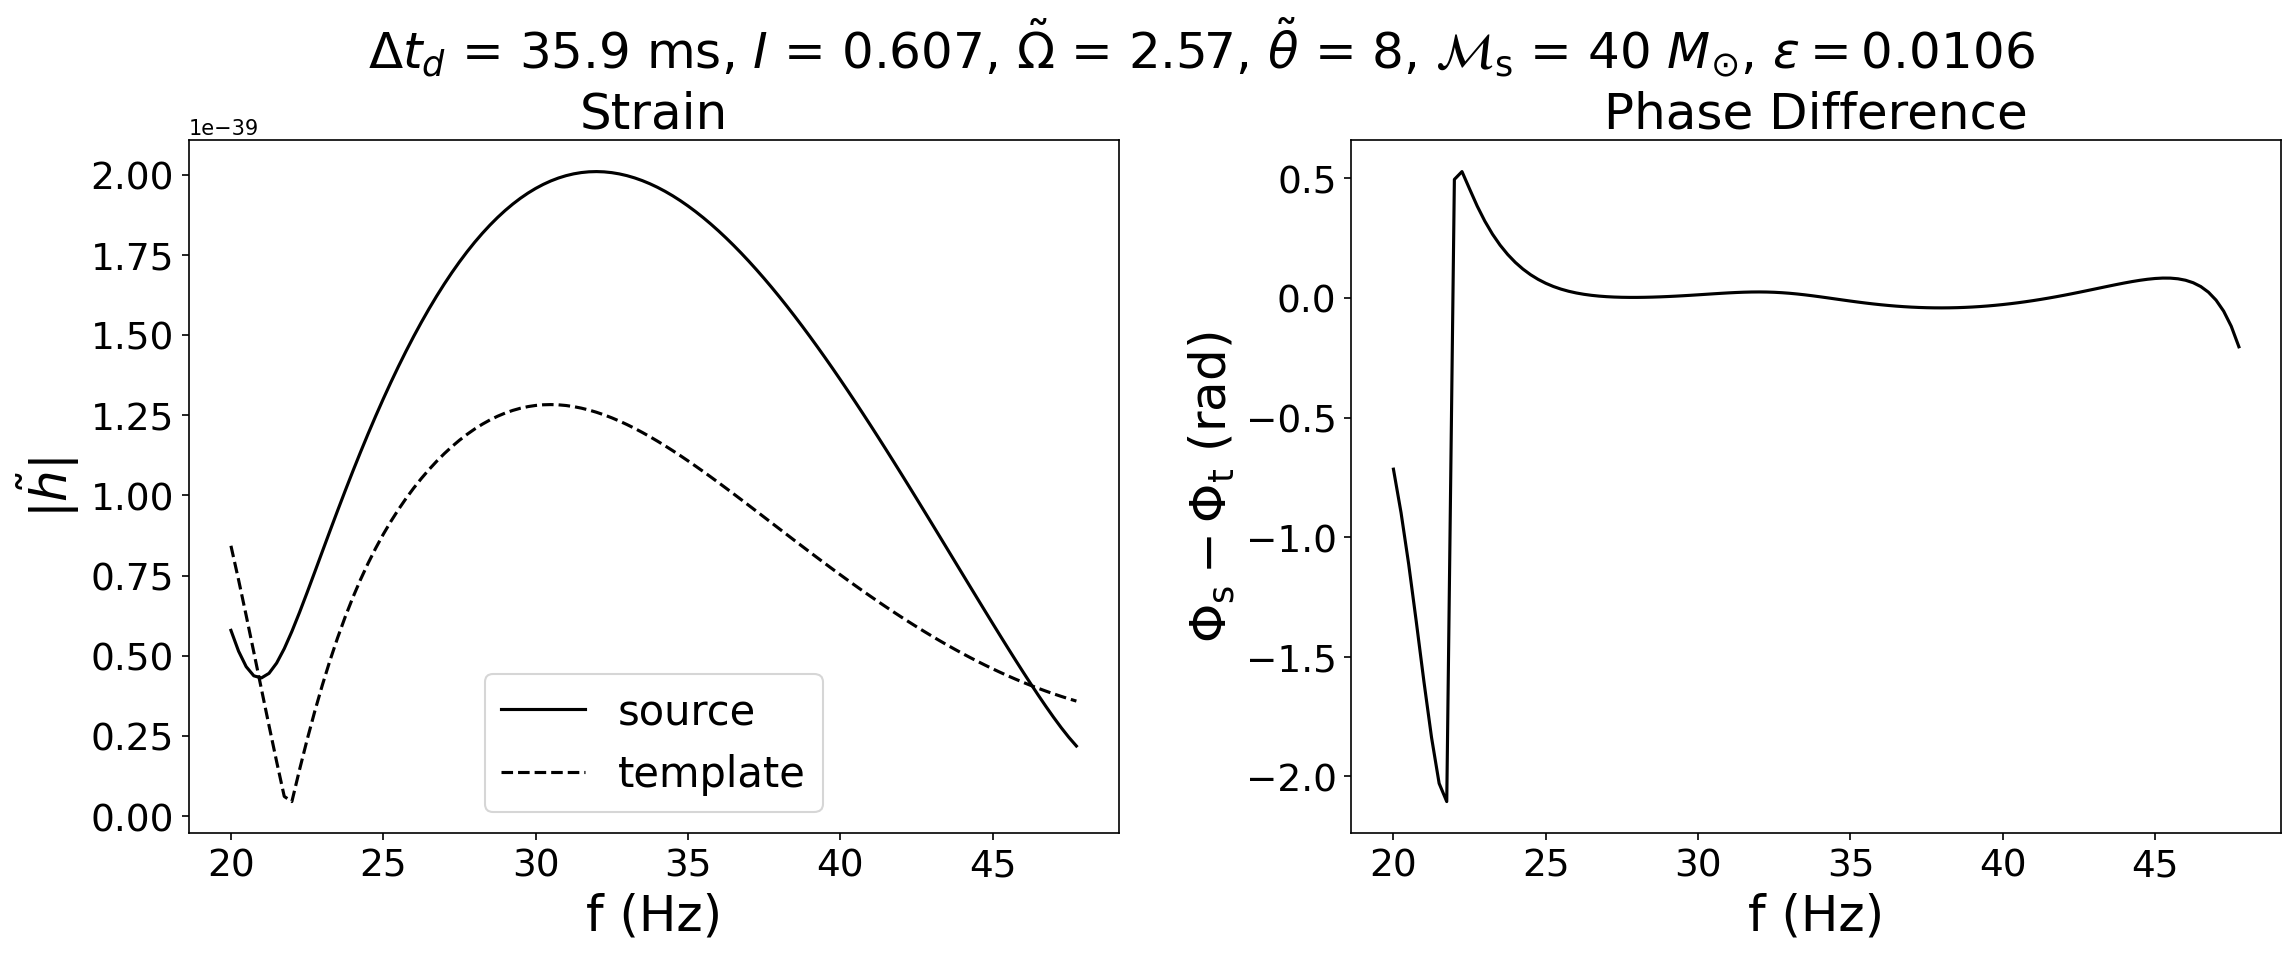

In [8]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)

MLz_arr = data_td["MLz_arr"]
td_arr = data_td["td_arr"]

for i in range(len(MLz_arr)):
    lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_td[td_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()

In [ ]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)

y_arr = data_I["y_arr"]
MLz_arr = data_I["MLz_arr"]
I_arr = data_I["I_arr"]

for i in range(len(y_arr)):
    lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
    lens_params["y"] = y_arr[i]
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_I[I_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()